# DS2과정 2기 10조 HW7. Text Processing
### (장용철, 이현영, 권준오)

## 1.HTML Parser

In [1]:
from bs4 import BeautifulSoup
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from html.parser import HTMLParser
import requests

In [2]:
class MyParser(HTMLParser):
    
    def __init__(self):
        HTMLParser.__init__(self)
        self.currentTag = None
        self.labelDataList = []
        
    def handle_starttag(self, tag, attrs):
        if tag=='a':
            for name, value in attrs:
                if value[:4] == '/lab':
                    self.currentTag = 'labName'
                    break
                if value[:10] == '/professor':
                    self.currentTag = 'professor'
                    break;
        if tag =='td':
            for name, value in attrs:
                if value == 'views-field views=field-field-office':
                    self.currentTag = 'location'
                    break;
                if value == 'views-field views-field-field-abbrevation':
                    self.currentTag = 'abbreviation'
                    break;
        if tag=='br':
            self.currentTag = 'phone'
    
    def handle_data(self, data):
        if self.currentTag is not None:
            self.labelDataList.append((self.currentTag,data))
        self.currentTag = None

    def LabInfoDict(self):
        self.dic={}
        for labelData in self.labelDataList:            
            self.dic.setdefault(labelData[0],[]).append(labelData[1])
        
        return self.dic
    

parser = MyParser()
html_str = '<html><head></head><body><tr class="odd views-row-first"><td class="views-field views-field-title" ><a href="/lab/3%EC%B0%A8%EC%9B%90-%EB%AA%A8%EB%8D%B8%EB%A7%81-%EB%B0%8F-%EC%B2%98%EB%A6%AC-%EC%97%B0%EA%B5%AC%EC%8B%A4"> 3차원 모델링 및 처리 연구실 </a></td><td class="views-field views-field-field-faculty" ><a href="/professor/%EA%B9%80%EB%AA%85%EC%88%98"> 김명수 </a></td><td class="views-field views-field-field-office" > 302동 315-1호 <br /> (02) 880-1840 </td><td class="views-field views-field-field-abbreviation" > 3MAP </td></tr><tr class="odd"><td class="views-field views-field-title" ><a href="/lab/%EC%9D%B8%ED%84%B0%EB%84%B7-%EB%8D%B0%EC%9D%B4%ED%84%B0%EB%B2%A0%EC%9D%B4%EC%8A%A4-%EC%97%B0%EA%B5%AC%EC%8B%A4"> 인터넷 데이터베이스 연구실 </a></td><td class="views-field views-field-field-faculty" ><a href="/professor/%EA%B9%80%ED%98%95%EC%A3%BC"> 김형주 </a></td><td class="views-field views-field-field-office" > 301동 453호 <br/> (02) 880-1830 </td><td class="views-field views-field-field-abbreviation" > IDB </td></tr><tr class="even"><td class="views-field views-field-title" ><a href="/lab/%EB%8D%B0%EC%9D%B4%ED%84%B0%EB%B2%A0%EC%9D%B4%EC%8A%A4-%EC%8B%9C%EC%8A%A4%ED%85%9C-%EC%97%B0%EA%B5%AC%EC%8B%A4"> 데이터베이스 시스템 연구실 </a></td><td class="views-field views-field-field-faculty" ><a href="/professor/%EB%AC%B8%EB%B4%89%EA%B8%B0"> 문봉기 </a></td><td class="views-field views-field-field-office" > 301동 418호 / 452-2호 <br /> (02) 880-6575 </td><td class="views-field views-field-field-abbreviation" > DBS </td></tr></body></html>'
parser.feed(html_str)

dic = parser.LabInfoDict()
print(dic)


{'labName': [' 3차원 모델링 및 처리 연구실 ', ' 인터넷 데이터베이스 연구실 ', ' 데이터베이스 시스템 연구실 '], 'professor': [' 김명수 ', ' 김형주 ', ' 문봉기 '], 'phone': [' (02) 880-1840 ', ' (02) 880-1830 ', ' (02) 880-6575 ']}


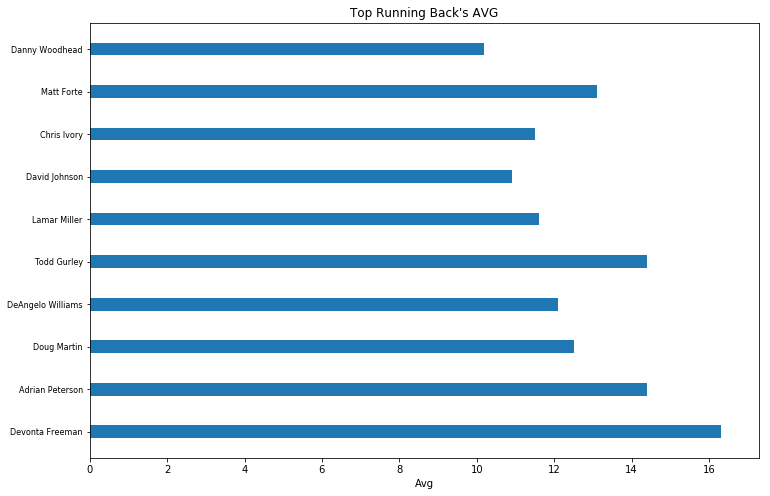

In [3]:
def to_numeric(s):
    try:
        conv = float(s)
        i = int(conv)
        if i == conv:
            return i
        return conv
    except ValueError:
        return s

def get_nfl_table(url, limit=None):
    response = requests.get(url)
    soup = BeautifulSoup(response.text,'html.parser')
    table = soup.select_one("#data")
    headers = [header.text for header in table.find_all('th')]
    body_trs = table.find('tbody').find_all('tr',limit=limit)
    records = [{key:to_numeric(rec.string) for key,rec in zip(headers, record.find_all('td'))} for record in body_trs]
    
    return records

url = 'https://www.fantasypros.com/nfl/reports/leaders/rb.php?year=2015'
table = pd.DataFrame(get_nfl_table(url,10))

runneravg = table['Avg']
runnerlist = table['Player']

fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(111)
ypos = np.arange(10)
rects = plt.barh(ypos, runneravg, align='center', height=0.3)
plt.yticks(ypos, runnerlist, size=8)
plt.xlabel('Avg')
plt.title("Top Running Back's AVG")
plt.xlim(0, max(runneravg)+1)
plt.show()

## 2. Regular Expression

In [4]:
import re

string = "Earth is the third planet from the Sun"

pat = re.compile(r"\b[\w]{2}")

result = pat.findall(string)

result

['Ea', 'is', 'th', 'th', 'pl', 'fr', 'th', 'Su']

In [5]:
string="abc.test@gmail.com,xyz@test.in,test.first@analyticsvidhya.com,first.test@rest.biz"

pat = re.compile(r"[@]\w+[.]com")

result = pat.findall(string)

result

['@gmail.com', '@analyticsvidhya.com']

In [6]:
string = "'Amit 34-3456 12-05-2007,XYZ 56-4532 11-11-2011,ABC 67-8945 12-01-2009"

pat = re.compile(r"\d{2}[-]\d{2}[-]\d{4}")

result = pat.findall(string)

result

['12-05-2007', '11-11-2011', '12-01-2009']

In [7]:
string = "Earth's gravity interacts with other objects in space, especially the Sun and the Moon"

pat = re.compile(r"\b[A|a|E|e|I|i|O|o|U|u]\w+")

result = pat.findall(string)

result

['Earth', 'interacts', 'other', 'objects', 'in', 'especially', 'and']

In [8]:
lst = ['010-256-1354','010-1234-5576','070-642-0384','010-290*-4858','0105734123']

pat = re.compile(r"010[-]\d{3,4}[-]\d{4}")

for val in lst:
    m = pat.search(val)
    if m:
        print(m.group())
    else:
        print(False)
        

010-256-1354
010-1234-5576
False
False
False
